# The Spark Foundation

### Data Science and Business analytics Intern

### Author: RITESH ANIL DANGADE

# task 1 : Prediction using Supervised ML

In [4]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#reading data from url 
url='http://bit.ly/w-data'
data=pd.read_csv(url)

Exploring the data

In [7]:
print (data.shape)

(25, 2)


In [8]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

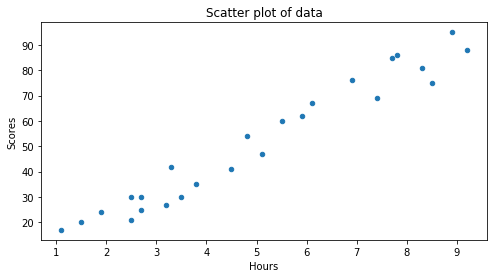

In [22]:
data.plot(kind='scatter',x='Hours',y='Scores',figsize=(8,4),title='Scatter plot of data')
plt.show()

In [23]:
data.corr(method='pearson')


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [24]:
hours=data['Hours']
scores=data['Scores']

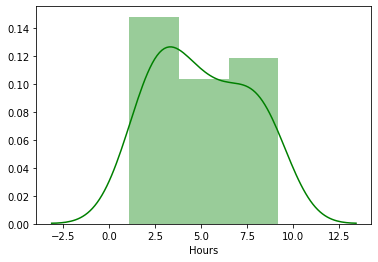

In [25]:
sns.distplot(hours,color='green')

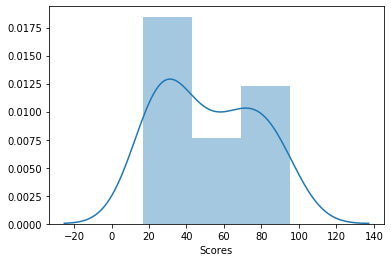

In [26]:
sns.distplot(scores)


Linear Regression

In [27]:
x=data.iloc[:,:-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [28]:
y=data.iloc[:,1].values

y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [33]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

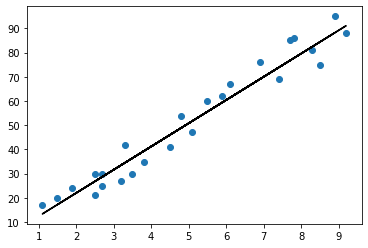

In [34]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line,color='black')
plt.show()

In [35]:
y_pred=reg.predict(x_test)
actual_predicted=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred})
actual_predicted

,Actual_value,Predicted_value
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


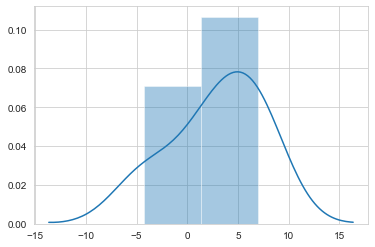

In [36]:
sns.set_style("whitegrid")
sns.distplot(np.array(y_test-y_pred))
plt.show()

What would be the predicted score if a student studies for 9.25 hour/day?

In [37]:
h=9.25
s=reg.predict([[h]])
print("If a student studies for {} hours per day , he/she will score {}% in exam.".format(h,s))

If a student studies for 9.25 hours per day , he/she will score [91.56986604]% in exam.


Model Evaluationfrom sklearn import metrics


In [38]:
from sklearn import metrics

In [39]:
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print('R2.Score:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2.Score: 0.971014141329942
